<a href="https://colab.research.google.com/github/ikram-maulanaadnan/IKRAM/blob/main/avocado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Membangun model dengan arsitektur yang telah ditentukan...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 10, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 10, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 5, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,269 (231.52 KB)

 Trainable params: 58,885 (230.02 KB)

 Non-trainable params: 384 (1.50 KB)


Memulai Pelatihan Model...
Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.4086 - loss: 1.6255 - val_accuracy: 0.4750 - val_loss: 1.4487
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8905 - loss: 0.3336 - val_accuracy: 0.8000 - val_loss: 1.3649
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9732 - loss: 0.1456 - val_accuracy: 0.8750 - val_loss: 1.3141
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9760 - loss: 0.1043 - val_accuracy: 0.9250 - val_loss: 1.2717
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9928 - loss: 0.0425 - val_accuracy: 0.9250 - val_loss: 1.2369
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9966 - loss: 0.0559 - val_accuracy: 0.9250 - val_loss: 1.2028
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9979 - loss: 0.0160 - val_accuracy: 0.9250 - val_loss: 1.1691
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9966 - loss: 0.0279 - val

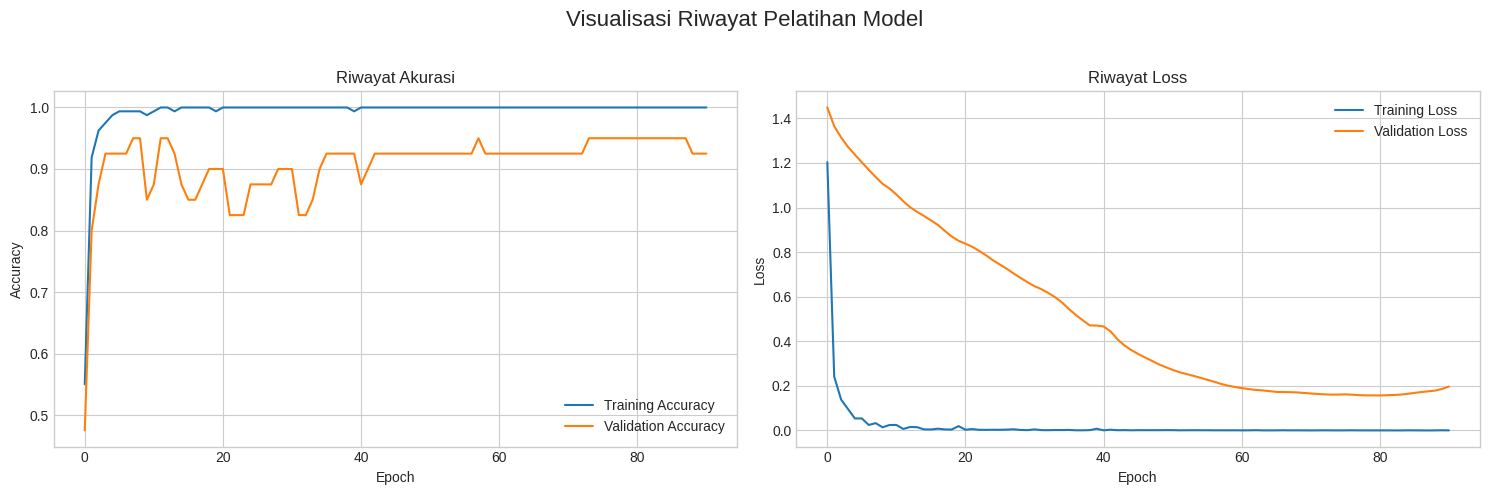

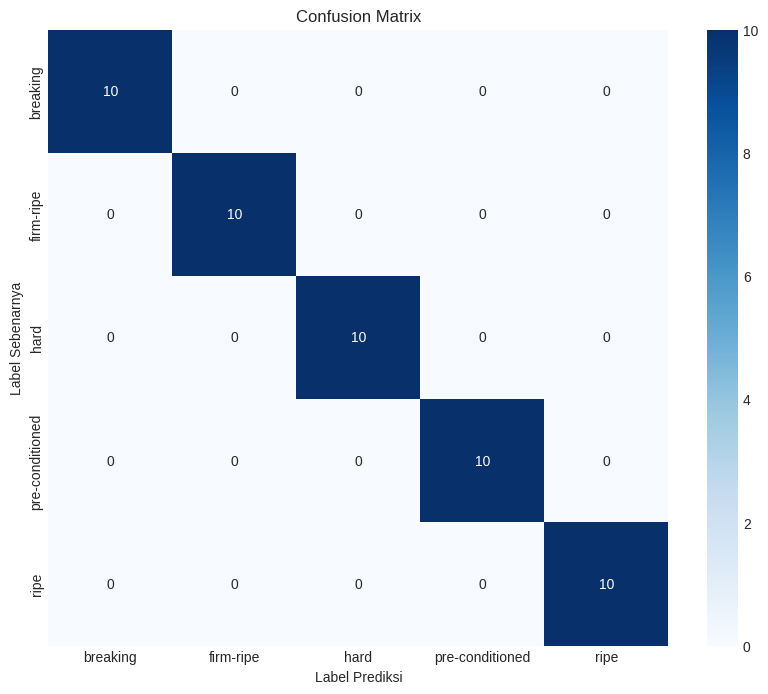

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Pra-pemrosesan Data
df = pd.read_csv('avocado_ripeness_dataset.csv')
X = df.drop('ripeness', axis=1)
y = df['ripeness']
X = pd.get_dummies(X, columns=['color_category'], drop_first=True)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = tf.keras.utils.to_categorical(y_encoded)
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = np.expand_dims(X_train_scaled, axis=2)
X_test_reshaped = np.expand_dims(X_test_scaled, axis=2)

# 2. Membangun Model Advanced (Arsitektur Manual)
print("Membangun model dengan arsitektur yang telah ditentukan...")
model = Sequential([
    # Input Layer
    tf.keras.Input(shape=(X_train_reshaped.shape[1], 1)),

    # Blok Konvolusi 1
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    # Blok Konvolusi 2
    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    # Flatten untuk mengubah data menjadi 1D
    Flatten(),

    # Blok Fully Connected (Dense)
    Dense(units=128, activation='relu'),
    Dropout(0.4), # Dropout untuk regularisasi

    # Lapisan Output
    Dense(y_categorical.shape[1], activation='softmax')
])

# Kompilasi model dengan learning rate yang umum digunakan
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# 3. Melatih Model dengan Callbacks
# Definisikan callbacks
callbacks = [
    # Hentikan jika val_loss tidak membaik setelah 10 epoch
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, verbose=1, restore_best_weights=True),
    # Opsi: simpan model terbaik jika diperlukan
    # tf.keras.callbacks.ModelCheckpoint(filepath="best_model_manual.h5", monitor="val_accuracy", save_best_only=True)
]

print("\nMemulai Pelatihan Model...")
history = model.fit(X_train_reshaped, y_train,
                    epochs=100,
                    validation_split=0.2,
                    callbacks=callbacks,
                    verbose=1)

# 4. Evaluasi Model Final
print("\nEvaluasi pada Data Uji:")
loss, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"  - Loss: {loss:.4f}")
print(f"  - Akurasi: {accuracy:.4f}")

# Laporan Klasifikasi
y_pred_probs = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

print("\nLaporan Klasifikasi:")
print(classification_report(y_test_labels, y_pred, target_names=label_encoder.classes_))

# 5. Visualisasi Hasil
# Plot riwayat akurasi dan loss
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Visualisasi Riwayat Pelatihan Model', fontsize=16)

# Plot Akurasi
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Riwayat Akurasi')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot Loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Riwayat Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Plot Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Label Sebenarnya')
plt.xlabel('Label Prediksi')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './skin-cancer-dataset/train'